Need to find an area covered by roughly 4 undithered FOVs for a full PhoSim simulation.

Want the area to have pixels with mean/typical depth= median survey depth. and not so scattered abs(max-min)depth.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import time
import pandas as pd
import lsst.sims.maf.metricBundles as metricBundles
os.chdir(os.path.join(os.getcwd() , '..' ))
from findDC1Regions import findDC1Regions

In [2]:
help(findDC1Regions)

Help on function findDC1Regions in module findDC1Regions:

findDC1Regions(coaddBundle, dbpath, plotTestPlots=True, filterBand='i', threshold=0.0001, nside=256, returnAll=False)
    Find candidate regions for DC1 (based on how wildly the average depth in the region 
    differs from the survey median depth).
    
    Returns a bunch of stuff ...
    
    Required Parameters
    -------------------
      * coaddBundle: dict: dictionary with keys= observing strategy names, pointing to corresponding
                           to a metricBundle object.
           NOTE: coaddBundle should have always have NoDither. If want to find regions based on a dithered
                 survey, the bundle should have the dithered data ALONG WITH the undithered one.
      * dbpath: str: path to the OpSim database.
    
    Optional Parameters
    -------------------
      * plotTestPlots: bool: set to False if dont want to plot things for debugging/testing code.
                             Default: True

In [3]:
workDir= os.getcwd()

### Based on NoDither coadded depth.

^^^ No region is good with threshold 0.0001 for NoDither .. 

### Based on SequentialHexDitherPerNight coadded depth.

In [4]:
path= '/Volumes/Transcend/'
path2= '2017-01-11/coaddM5Analysis_nside256_withDustExtinction_14pixelRadiusForMasking_rBand_minion1016_fullSurveyPeriod_directory/'
path3= 'maskedCoaddData/'
os.chdir(path+path2+path3)

# get the saved files
filenames = ['coaddM5Data_masked_r_NoDither.npz', 
             'coaddM5Data_masked_r_SequentialHexDitherPerNight.npz']

coaddBundle= {}
for i in range(len(filenames)):
    mB = metricBundles.createEmptyMetricBundle()
    mB.read(filenames[i])
    dithStrategy= mB.metadata.strip()   # key is assigned to be the same as dithStrategy
    print 'Filename for ' + dithStrategy + ': ', filenames[i]
    print ''

    coaddBundle[dithStrategy]= mB

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for NoDither:  coaddM5Data_masked_r_NoDither.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for SequentialHexDitherPerNight:  coaddM5Data_masked_r_SequentialHexDitherPerNight.npz




############################################
## Getting RA, Dec for HEALPix pixels ...

############################################
## Getting simdata ...

############################################
## Getting pixels_in_FOV ...
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Number of fieldIDs in pixel_in_FOV for SequentialHexDitherPerNight: 2249

############################################
## Finding good regions ...

############################################
## Finding good regions with threshold= 0.000100 using SequentialHexDitherPerNight

## Mean survey depth for SequentialHexDitherPerNight: 27.008246

## Mean survey depth for SequentialHexDitherPerNight: 27.008246
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes

############################################
## Plotting good regions with threshold= 0.000100 using SequentialHexDitherPerNight

## 

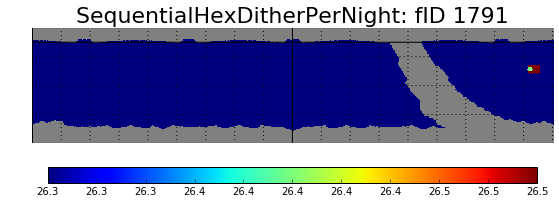

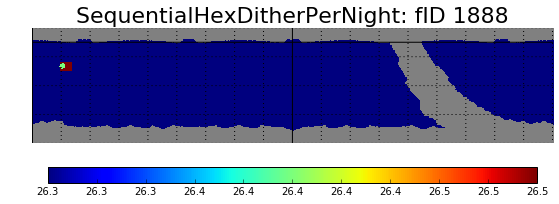


## Cicular regions (using plotRegion):


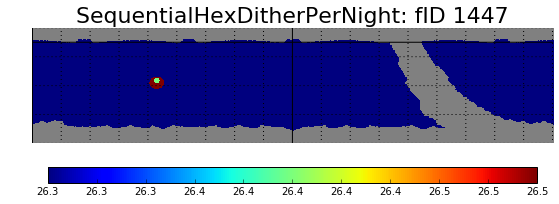

Time taken (s): 541.514387846


In [5]:
startTime= time.time()
dbpath = path+'minion_1016_sqlite.db'
output= findDC1Regions(coaddBundle, dbpath, plotTestPlots= False,
                       filterBand= 'r', returnAll= True)

focusDither, output_rect, output_disc, simdata, pixels_in_FOV, pixelNum, pixRA, pixDec= output

print 'Time taken (s):', time.time()-startTime

In [6]:
pd.DataFrame([output_rect['goodFiducialIDs'],output_rect['diffMeanMedian'],
             output_rect['scatterInDepth'], output_rect['fiducialRA'],
             output_rect['fiducialDec']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec'])

,0,1
goodFiducialIDs,1.791000e+03,1888.000000
DiffMeanMedian,6.268360e-07,0.000032
DepthScatter,4.555302e-01,0.364538
fiducialRA,3.423892e+00,2.778955
fiducialDec,-3.314060e-01,-0.295396


^^ So we have 2 rectangular regions with the average depth within 0.0001 of the median survey depth.

In [7]:
pd.DataFrame([output_disc['goodFiducialIDs'],output_disc['diffMeanMedian'],
             output_disc['scatterInDepth'], output_disc['fiducialRA'],
             output_disc['fiducialDec'], output_disc['contigIDs']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec',
             'contigIDs'])

,0
goodFiducialIDs,1447
DiffMeanMedian,8.51566e-05
DepthScatter,0.403503
fiducialRA,1.64132
fiducialDec,-0.496321
contigIDs,"[1447, [1323], [1431], [1333]]"


^^ So we have only 1 circular region with the average depth within 0.0001 of the median survey depth.

### Based on RandomDitherFieldPerVisit coadded depth.

In [8]:
path= '/Volumes/Transcend/'
path2= '2017-01-11/coaddM5Analysis_nside256_withDustExtinction_14pixelRadiusForMasking_rBand_minion1016_fullSurveyPeriod_directory/'
path3= 'maskedCoaddData/'
os.chdir(path+path2+path3)

# get the saved files
filenames = ['coaddM5Data_masked_r_NoDither.npz', 
             'coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz']

coaddBundle= {}
for i in range(len(filenames)):
    mB = metricBundles.createEmptyMetricBundle()
    mB.read(filenames[i])
    dithStrategy= mB.metadata.strip()   # key is assigned to be the same as dithStrategy
    print 'Filename for ' + dithStrategy + ': ', filenames[i]
    print ''

    coaddBundle[dithStrategy]= mB

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for NoDither:  coaddM5Data_masked_r_NoDither.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for RandomDitherFieldPerVisit:  coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz




############################################
## Getting RA, Dec for HEALPix pixels ...

############################################
## Getting simdata ...

############################################
## Getting pixels_in_FOV ...
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Number of fieldIDs in pixel_in_FOV for RandomDitherFieldPerVisit: 2250

############################################
## Finding good regions ...

############################################
## Finding good regions with threshold= 0.000100 using RandomDitherFieldPerVisit

## Mean survey depth for RandomDitherFieldPerVisit: 27.007376

## Mean survey depth for RandomDitherFieldPerVisit: 27.007376
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Something is wrong. Should have only one FOV corresponding to the central pixel (fID: 2248) but have [2134 2140]
Something is wrong. Should ha

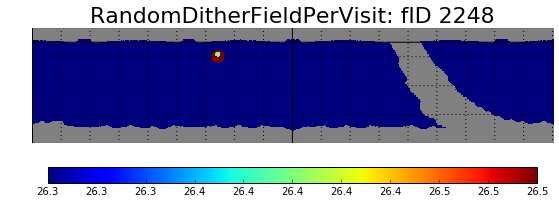

Time taken (s): 543.66020298


In [9]:
startTime= time.time()
dbpath = path+'minion_1016_sqlite.db'
output= findDC1Regions(coaddBundle, dbpath, plotTestPlots= False, 
                       filterBand= 'r', returnAll= True)

focusDither, output_rect, output_disc, simdata, pixels_in_FOV, pixelNum, pixRA, pixDec= output

print 'Time taken (s):', time.time()-startTime

In [10]:
output_rect.keys()

['fiducialRA',
 'fiducialGalacticLat',
 'regionPixels',
 'scatterInDepth',
 'diffMeanMedian',
 'fiducialDec',
 'goodFiducialIDs']

In [11]:
pd.DataFrame([output_rect['goodFiducialIDs'],output_rect['diffMeanMedian'],
             output_rect['scatterInDepth'], output_rect['fiducialRA'],
             output_rect['fiducialDec'], output_rect['fiducialGalacticLat']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec', 'fiducialGalacticLat'])

""
goodFiducialIDs
DiffMeanMedian
DepthScatter
fiducialRA
fiducialDec
fiducialGalacticLat


In [12]:
pd.DataFrame([output_disc['goodFiducialIDs'],output_disc['diffMeanMedian'],
             output_disc['scatterInDepth'], output_disc['fiducialRA'],
             output_disc['fiducialDec'], output_disc['fiducialGalacticLat'], output_disc['contigIDs']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec', 
              'fiducialGalacticLat','contigIDs'])

,0
goodFiducialIDs,2248
DiffMeanMedian,4.45407e-06
DepthScatter,0.34838
fiducialRA,0.906446
fiducialDec,-0.17746
fiducialGalacticLat,-0.864161
contigIDs,"[2248, [2134, 2140], [2140], [2134, 2246]]"


^^^ Only one circular region with average depth within 0.0001 of the median survey depth. No rectangular regions. 


############################################
## Getting RA, Dec for HEALPix pixels ...

############################################
## Getting simdata ...

############################################
## Getting pixels_in_FOV ...
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Number of fieldIDs in pixel_in_FOV for RandomDitherFieldPerVisit: 2250

############################################
## Finding good regions ...

############################################
## Finding good regions with threshold= 0.001000 using RandomDitherFieldPerVisit

## Mean survey depth for RandomDitherFieldPerVisit: 27.007376

## Mean survey depth for RandomDitherFieldPerVisit: 27.007376
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Something is wrong. Should have only one FOV corresponding to the 

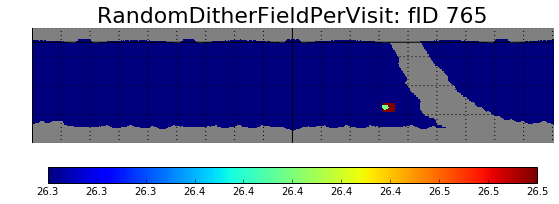

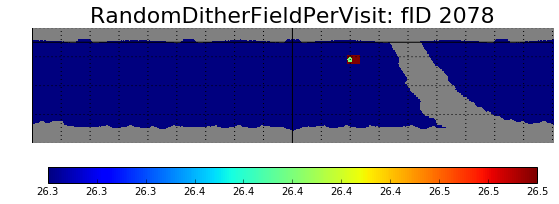

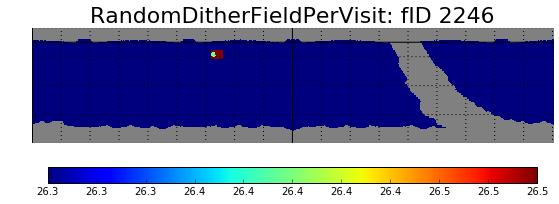

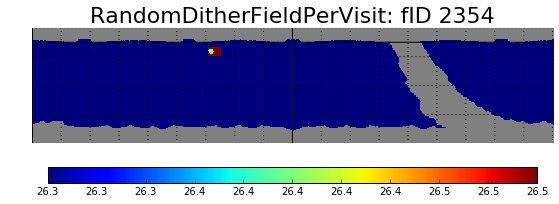

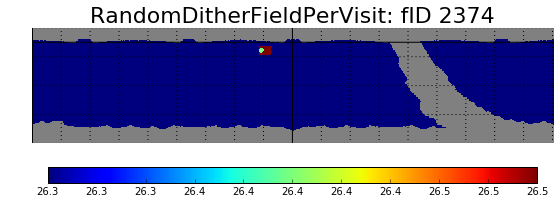

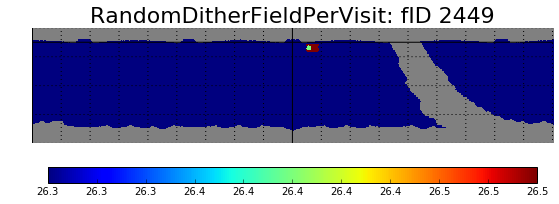

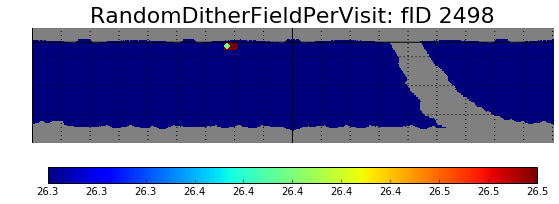

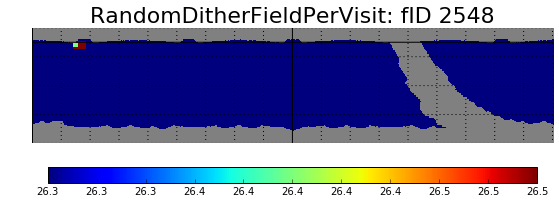


## Cicular regions (using plotRegion):


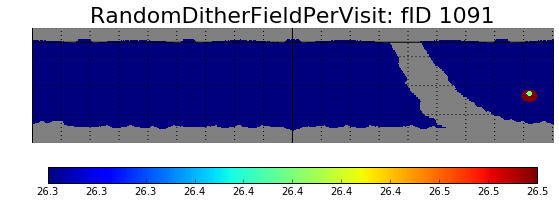

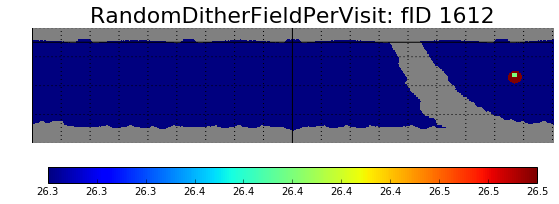

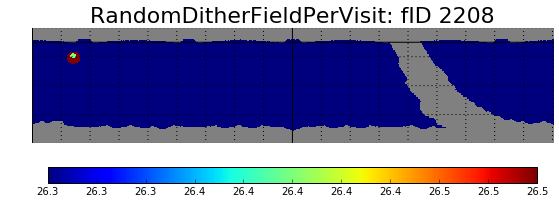

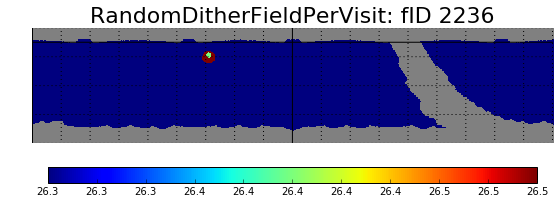

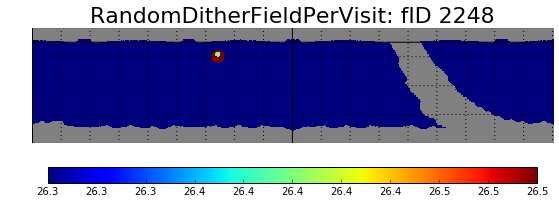

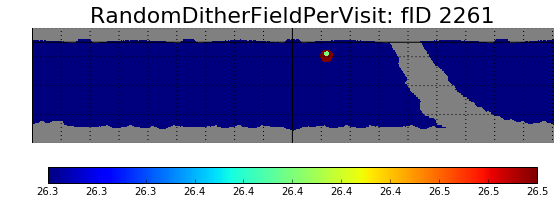

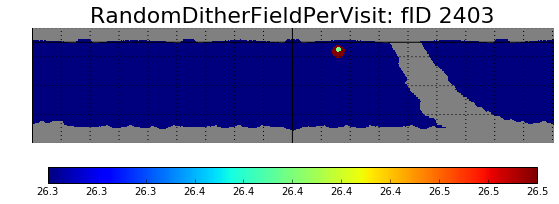

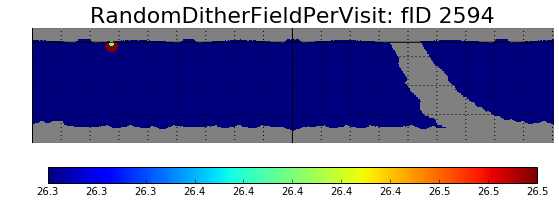

Time taken (s): 527.023490906


In [13]:
startTime= time.time()
dbpath = path+'minion_1016_sqlite.db'
output= findDC1Regions(coaddBundle, dbpath, plotTestPlots= False, threshold= 0.001,
                       filterBand= 'r', returnAll= True)

focusDither, output_rect, output_disc, simdata, pixels_in_FOV, pixelNum, pixRA, pixDec= output

print 'Time taken (s):', time.time()-startTime

In [14]:
pd.DataFrame([output_rect['goodFiducialIDs'],output_rect['diffMeanMedian'],
             output_rect['scatterInDepth'], output_rect['fiducialRA'],
             output_rect['fiducialDec']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec'])

,0,1,2,3,4,5,6,7
goodFiducialIDs,765.000000,2078.000000,2246.000000,2354.000000,2374.000000,2449.000000,2498.000000,2548.000000
DiffMeanMedian,0.000439,0.000609,0.000189,0.000998,0.000821,0.000132,0.000634,0.000898
DepthScatter,0.314283,0.826591,0.331809,0.727568,0.667229,0.327340,0.382888,0.582664
fiducialRA,5.170772,5.597391,0.960895,0.986551,0.378991,6.093002,0.794443,2.622837
fiducialDec,-0.790683,-0.216691,-0.156207,-0.114111,-0.104445,-0.076277,-0.053329,-0.037368


In [15]:
pd.DataFrame([output_disc['goodFiducialIDs'],output_disc['diffMeanMedian'],
             output_disc['scatterInDepth'], output_disc['fiducialRA'],
             output_disc['fiducialDec'], output_disc['contigIDs']], 
             ['goodFiducialIDs', 'DiffMeanMedian', 'DepthScatter', 'fiducialRA' , 'fiducialDec',
             'contigIDs'])

,0,1,2,3,4,5,6,7
goodFiducialIDs,1091,1612,2208,2236,2248,2261,2403,2594
DiffMeanMedian,0.000321339,0.000200455,0.000747357,0.000626201,4.45407e-06,0.000533554,0.000950545,0.000774568
DepthScatter,0.374155,0.412301,0.316956,0.340857,0.34838,0.327339,0.786514,0.383914
fiducialRA,3.4343,3.60842,2.64747,1.01495,0.906446,5.87807,5.73884,2.18617
fiducialDec,-0.654154,-0.427736,-0.195752,-0.187589,-0.17746,-0.172333,-0.117321,-0.0473498
contigIDs,"[1091, [986], [1002], [1077]]","[1612, [1495, 1511], [1511], [1495, 1602]]","[2208, [2083, 2104], [2083, 2198], [2104]]","[2236, [2116, 2126], [2126], [2116, 2224]]","[2248, [2134, 2140], [2140], [2134, 2246]]","[2261, [2143, 2153], [2153], [2143, 2255]]","[2403, [2287], [2287], [2283, 2391]]","[2594, [2476, 2480], [2480], [2476, 2580]]"


In [16]:
focusDither

'RandomDitherFieldPerVisit'

Check to see how the optimal region for SequentialHexDitherPerNight does for RandomDither. If it is typical, then go with it.

In [17]:
path= '/Volumes/Transcend/'
path2= '2017-01-11/coaddM5Analysis_nside256_withDustExtinction_14pixelRadiusForMasking_rBand_minion1016_fullSurveyPeriod_directory/'
path3= 'maskedCoaddData/'
os.chdir(path+path2+path3)

# get the saved files
filenames = ['coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz',
            'coaddM5Data_masked_r_SequentialHexDitherPerNight.npz']

bundle= {}
for i in range(len(filenames)):
    mB = metricBundles.createEmptyMetricBundle()
    mB.read(filenames[i])
    dithStrategy= mB.metadata.strip()   # key is assigned to be the same as dithStrategy
    print 'Filename for ' + dithStrategy + ': ', filenames[i]
    print ''

    bundle[dithStrategy]= mB

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for RandomDitherFieldPerVisit:  coaddM5Data_masked_r_RandomDitherFieldPerVisit.npz

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes
Filename for SequentialHexDitherPerNight:  coaddM5Data_masked_r_SequentialHexDitherPerNight.npz



In [18]:
from intermediates import findRegionPixels

In [19]:
def checkDepth(dither, ID, disc= True):
    inSurvey= np.where(bundle[dither].metricValues.mask==False)[0]
    surveyMedianDepth= np.median(bundle[dither].metricValues.data[inSurvey])
    print 'Mean survey depth for %s: %f'% (dither, surveyMedianDepth)
    fiducialRA, fiducialDec, diskPixels= findRegionPixels(ID, simdata, 256, disc, 0.0305)
    typicalDepth= np.mean(bundle[dither].metricValues.data[diskPixels])
    print 'Diff depth', abs(typicalDepth-surveyMedianDepth)
    print 'Scatter: ', abs(max(bundle[dither].metricValues.data[diskPixels])-min(bundle[dither].metricValues.data[diskPixels]))

In [20]:
fID= 1447
checkDepth(focusDither, fID)
checkDepth('SequentialHexDitherPerNight', fID)

Mean survey depth for RandomDitherFieldPerVisit: 27.007376
Diff depth 0.00342078945095
Scatter:  0.29893617755
Mean survey depth for SequentialHexDitherPerNight: 27.008246
Diff depth 8.51565915703e-05
Scatter:  0.403502732117


In [21]:
fID= 2248
checkDepth(focusDither, fID)
checkDepth('SequentialHexDitherPerNight', fID)

Mean survey depth for RandomDitherFieldPerVisit: 27.007376
Diff depth 4.45407181004e-06
Scatter:  0.348380329222
Mean survey depth for SequentialHexDitherPerNight: 27.008246
Diff depth 0.00331808733256
Scatter:  0.352746827789
